In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\xiexi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\xiexi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\xiexi\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\xiexi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\xiexi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\xiexi\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\xiexi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\xiexi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\xiexi\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\xiexi\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\xiexi\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\xiexi\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\xiexi\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

1.	API Setup

In [2]:
api_key = "3bec3344a4b0bca3f2c6bbde84451eed"
TENORS = {"1M":"DGS1MO" ,"3M":"DGS3MO" ,"6M": "DGS6MO","1Y": "DGS1","2Y":"DGS2" ,
          "3Y": "DGS3","5Y": "DGS5","7Y":"DGS7" ,"10Y": "DGS10","20Y": "DGS20","30Y":"DGS30"}
start_date='2023-01-01'
end_date='2023-12-31'

2,3. Data Pulling and Data Storage

In [3]:
yield_data = pd.DataFrame()
for tenor, field in TENORS.items():
    url = f"https://api.stlouisfed.org/fred/series/observations?series_id={field}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}"    
    response = requests.get(url)
    if response.status_code == 200:
        observations = pd.json_normalize(response.json().get('observations', []))
        temp_df = observations[observations.ne('.').all(axis = 1)]
            
        if not temp_df.empty:
            temp_df['date'] = pd.to_datetime(temp_df['date'])
            temp_df.set_index('date', inplace=True)
            yield_data[tenor] = temp_df['value'].astype(float)
        else:
            print(f"Failed to retrieve data for {tenor} ({field}): {response.status_code}, {response.text}")

    # Drop any rows with all NaN values (optional)
    yield_data.dropna(how='all', inplace=True)

    # Set the index name
    yield_data.index.name = 'Date'

C:\Users\xiexi\AppData\Local\Temp\ipykernel_50356\2498999806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = pd.to_datetime(temp_df['date'])
C:\Users\xiexi\AppData\Local\Temp\ipykernel_50356\2498999806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['date'] = pd.to_datetime(temp_df['date'])
C:\Users\xiexi\AppData\Local\Temp\ipykernel_50356\2498999806.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

4.	Spread Calculation

In [4]:
bond_data = pd.read_excel("data/Part 1.bond_yields.xlsx") #store to local first change to git later 

In [5]:
def interpol(wal, t_yield):
    #here im assuming it's as of the latest date. Alternative depends of the period of the data, can use average or others
    yield_curve = t_yield.iloc[-1].dropna()
    tenor_years = np.array([float(k.replace("M",""))/12 if "M" in k else float(k.replace("Y", "")) for k in yield_curve.index])
    int_yield = np.interp(wal, tenor_years, yield_curve.values)
    return int_yield

In [6]:
bond_data["Treasury Yield"] = bond_data["WAL (years)"].apply(lambda wal: interpol(wal, yield_data))
bond_data["Spread"] = bond_data["Yield (%)"] - bond_data["Treasury Yield"]

5. Plot

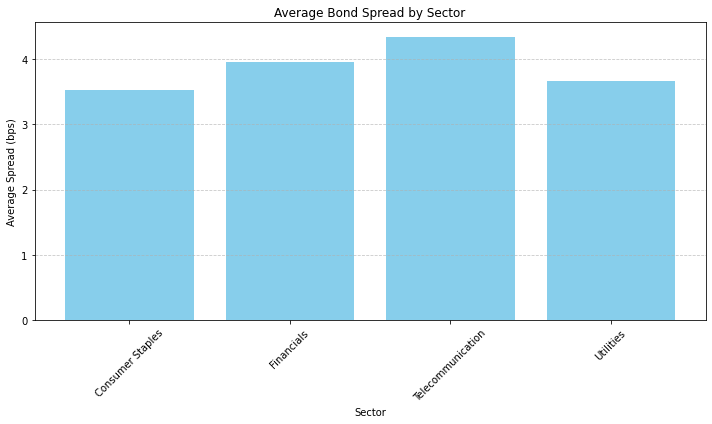

In [7]:
avg_spread = bond_data.groupby('Sector')['Spread'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Using matplotlib
plt.bar(avg_spread['Sector'], avg_spread['Spread'], color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Average Spread (bps)')
plt.title('Average Bond Spread by Sector')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\xiexi\AppData\Local\Temp\ipykernel_50356\2251605392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='Spread', data=bond_data, palette='viridis')


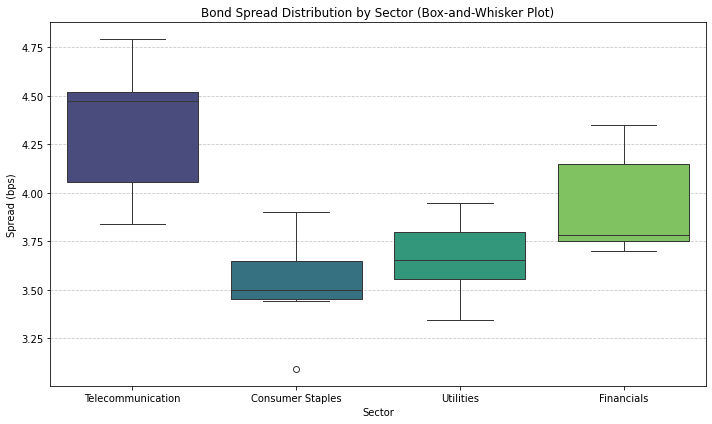

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='Spread', data=bond_data, palette='viridis')

# Add title and labels
plt.title('Bond Spread Distribution by Sector (Box-and-Whisker Plot)')
plt.xlabel('Sector')
plt.ylabel('Spread (bps)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()